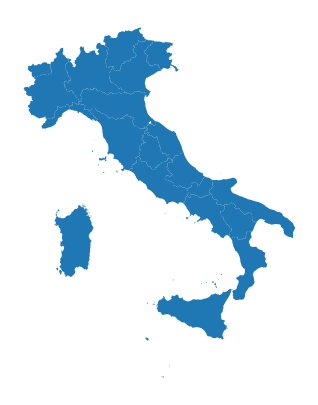

,COD_REG,NOME_REG,SHAPE_Leng,SHAPE_Area,geometry
0,1,Piemonte,1.236869e+06,2.539410e+10,"POLYGON ((457832.312 5145701.000, 458745.249 5..."
1,2,Valle d'Aosta / Vallée d'Aoste,3.111651e+05,3.259041e+09,"POLYGON ((390734.999 5091965.001, 390830.999 5..."
2,3,Lombardia,1.411265e+06,2.386270e+10,"MULTIPOLYGON (((595736.187 5163715.001, 596126..."
3,4,Trentino Alto Adige / Südtirol,8.005341e+05,1.360802e+10,"POLYGON ((743386.080 5219948.900, 743472.190 5..."
4,5,Veneto,1.057856e+06,1.840550e+10,"POLYGON ((768209.001 5175597.001, 768220.251 5..."


In [23]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np

from matplotlib import font_manager

font_dirs = ['style/fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.style.use('default')
plt.style.use('style/style.mplstyle')


italy = gpd.read_file('../resources/reg2011_g.shp')
italy.plot(figsize=(5, 5))
plt.axis("off")
plt.show()

regioni = ["Piemonte", "Valle d'Aosta / Vallée d'Aoste",
           "Lombardia", "Trentino Alto Adige / Südtirol",
           "Veneto", "Friuli-Venezia Giulia", "Liguria",
           "Emilia-Romagna", "Toscana", "Umbria", "Marche",
           "Lazio", "Abruzzo", "Molise", "Campania", "Puglia",
           "Basilicata", "Calabria", "Sicilia", "Sardegna"]

italy["NOME_REG"] = regioni
italy.head()

In [30]:
df = pd.read_csv("../data/fenomeno/violenza/Tipo di autore e regione (2014).csv")
df = df[["Territorio", "TIPO_DATO_VIOLENZA", "TIPOAUT","Tipo di autore", "TIPOVIOLENZA", "Tipo di violenza", "Value"]]
df.head()

,Territorio,TIPO_DATO_VIOLENZA,TIPOAUT,Tipo di autore,TIPOVIOLENZA,Tipo di violenza,Value
0,Italia,W16_70_PNP_LT,ANY_P_NOP,qualsiasi uomo (partner e non partner),PHSEX,violenza fisica o sessuale,31.5
1,Italia,W16_70_PNP_LT,ANY_P_NOP,qualsiasi uomo (partner e non partner),PHY,violenza fisica,20.2
2,Italia,W16_70_PNP_LT,ANY_P_NOP,qualsiasi uomo (partner e non partner),SEXVIOL,violenza sessuale,21.0
3,Italia,W16_70_PNP_LT,ANY_P_NOP,qualsiasi uomo (partner e non partner),RAPE_OR_ATT,stupro o tentato stupro,5.4
4,Italia,W16_70_PNP_LT,NOP,uomo non partner,PHSEX,violenza fisica o sessuale,24.7


In [37]:
df_partner_attuale = df[(df["TIPO_DATO_VIOLENZA"] == "W16_70_CP_LT")]
df_partner_attuale.head()

,Territorio,TIPO_DATO_VIOLENZA,TIPOAUT,Tipo di autore,TIPOVIOLENZA,Tipo di violenza,Value
36,Italia,W16_70_CP_LT,CURR_P,partner attuale,PHSEX,violenza fisica o sessuale,5.2
37,Italia,W16_70_CP_LT,CURR_P,partner attuale,PHY,violenza fisica,4.1
38,Italia,W16_70_CP_LT,CURR_P,partner attuale,SEXVIOL,violenza sessuale,2.0
39,Italia,W16_70_CP_LT,CURR_P,partner attuale,RAPE_OR_ATT,stupro o tentato stupro,0.5
88,Piemonte,W16_70_CP_LT,CURR_P,partner attuale,PHSEX,violenza fisica o sessuale,4.8


In [39]:
df_partner_attuale_phsex = df_partner_attuale[(df_partner_attuale["TIPOVIOLENZA"] == "PHSEX")]
df_partner_attuale_phsex.head()

,Territorio,TIPO_DATO_VIOLENZA,TIPOAUT,Tipo di autore,TIPOVIOLENZA,Tipo di violenza,Value
36,Italia,W16_70_CP_LT,CURR_P,partner attuale,PHSEX,violenza fisica o sessuale,5.2
88,Piemonte,W16_70_CP_LT,CURR_P,partner attuale,PHSEX,violenza fisica o sessuale,4.8
140,Valle d'Aosta / Vallée d'Aoste,W16_70_CP_LT,CURR_P,partner attuale,PHSEX,violenza fisica o sessuale,5.7
192,Liguria,W16_70_CP_LT,CURR_P,partner attuale,PHSEX,violenza fisica o sessuale,5.4
244,Lombardia,W16_70_CP_LT,CURR_P,partner attuale,PHSEX,violenza fisica o sessuale,3.7


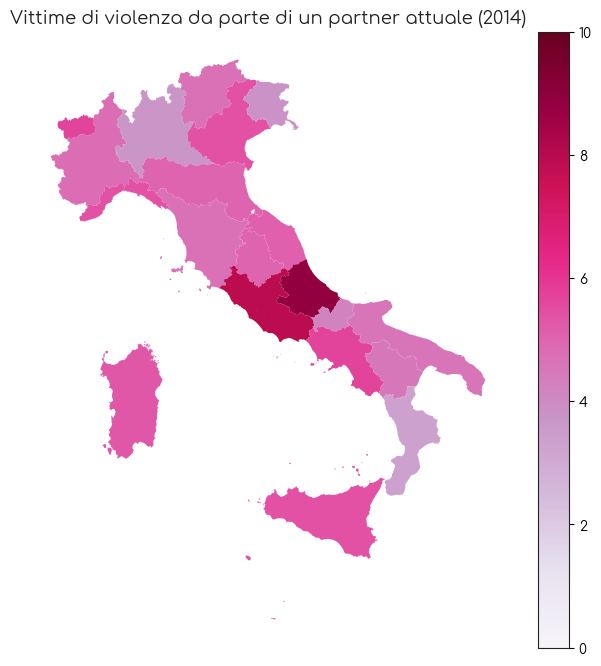

In [57]:
merge = italy.merge(df_partner_attuale_phsex, left_on="NOME_REG", right_on="Territorio")

merge.plot(
        column="Value",
        cmap='PuRd',
        legend=True,
        vmin=0,
        vmax=10,
        figsize=(8,8)
)

plt.axis('off')
plt.title("Vittime di violenza da parte di un partner attuale (2014)", fontsize=13)
plt.show()